In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

BASIC

In [2]:
# Read data into pandas dataframe
data = pd.read_csv('winequality-red.csv', sep = ';')

In [3]:
# Datatype of each coloumn
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
# Number of null values in each coloumn
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

EDA

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

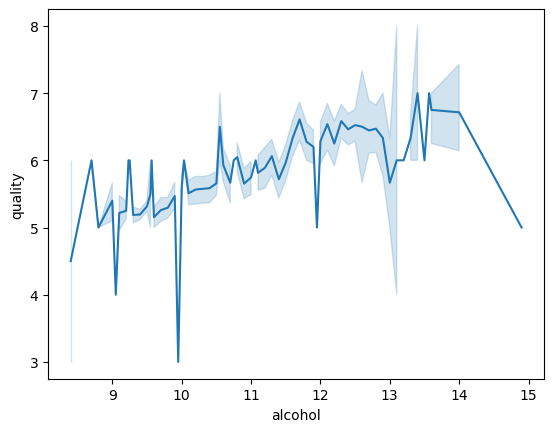

In [5]:
# Line plot with “quality” vs “alchohol %”
sns.lineplot(data=data, x="alcohol", y="quality")

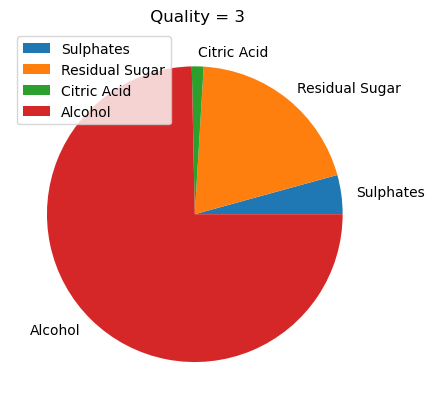

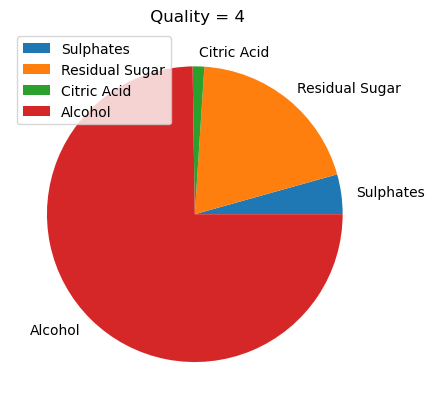

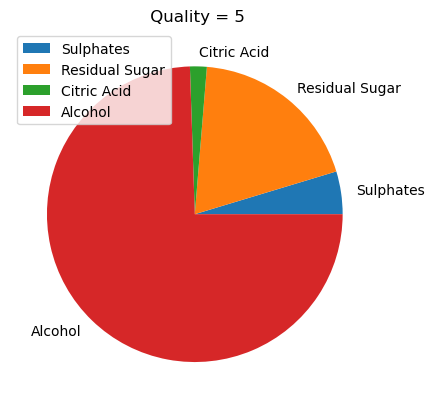

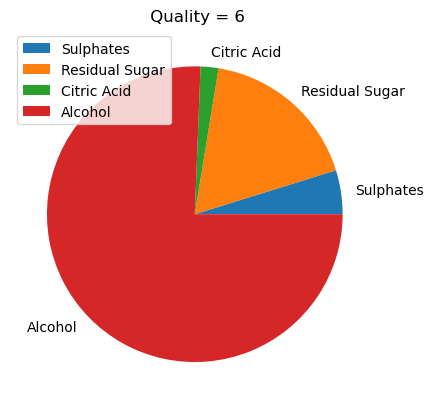

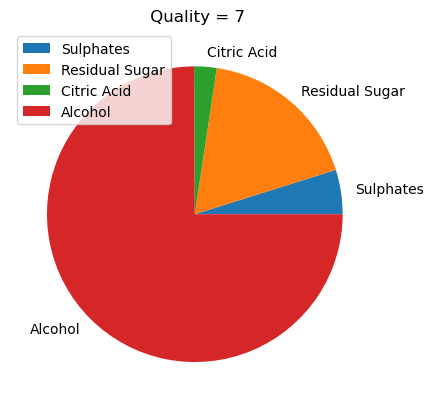

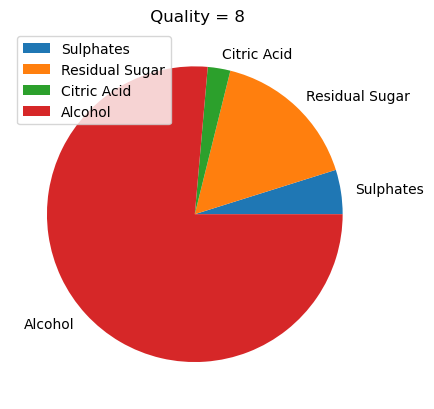

In [6]:
# Pie chart showing the composition of red wine
pie_data = data.groupby('quality').mean()

for i in range(3,9):
     sul = pie_data.loc[i].loc["sulphates"]
     sug = pie_data.loc[i].loc["residual sugar"]
     cit = pie_data.loc[i].loc["citric acid"]
     alc = pie_data.loc[i].loc["alcohol"]
     arr = [sul, sug,cit,alc]
     keys = ['Sulphates','Residual Sugar','Citric Acid','Alcohol']
     plt.title(f" Quality = {i}" )
     plt.pie(arr, labels = keys)
     plt.legend()
     plt.show()

In [7]:
# New column in the dataframe which has antilog values of the corresponding pH value
antilog_pH = []
arr = []
arr = data.pH
for i in range(1599):
    antilog_pH.append(np.power(10,-arr[i]))
data.insert(12, "AntiLog of pH", antilog_pH)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,AntiLog of pH
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.000309
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.000631
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.000550
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.000692
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.000309


fixed acidity              AxesSubplot(0.125,0.712609;0.168478x0.167391)
volatile acidity        AxesSubplot(0.327174,0.712609;0.168478x0.167391)
citric acid             AxesSubplot(0.529348,0.712609;0.168478x0.167391)
residual sugar          AxesSubplot(0.731522,0.712609;0.168478x0.167391)
chlorides                  AxesSubplot(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     AxesSubplot(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    AxesSubplot(0.529348,0.511739;0.168478x0.167391)
density                 AxesSubplot(0.731522,0.511739;0.168478x0.167391)
pH                          AxesSubplot(0.125,0.31087;0.168478x0.167391)
sulphates                AxesSubplot(0.327174,0.31087;0.168478x0.167391)
alcohol                  AxesSubplot(0.529348,0.31087;0.168478x0.167391)
quality                  AxesSubplot(0.731522,0.31087;0.168478x0.167391)
AntiLog of pH                  AxesSubplot(0.125,0.11;0.168478x0.167391)
dtype: object

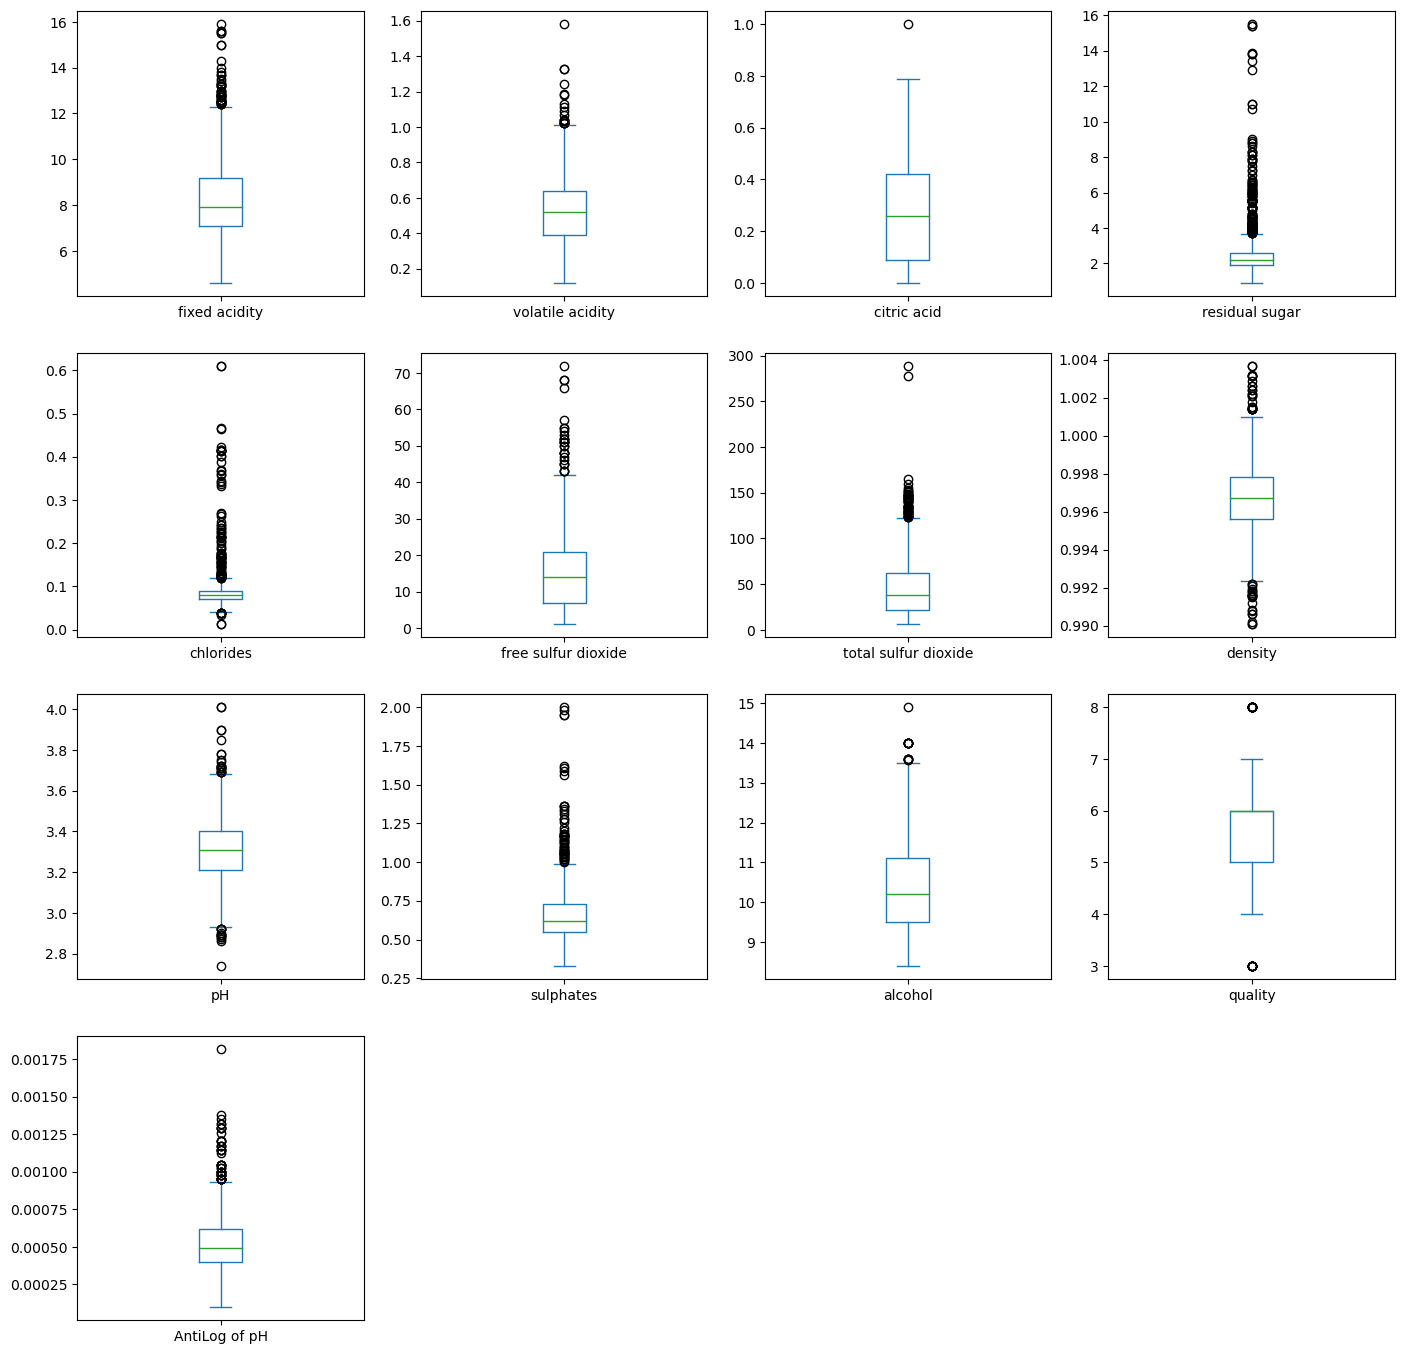

In [8]:
# Box and Whiskers plot
data.plot(kind ='box',subplots=True,layout =(4,4), figsize=(17,17))

In [9]:
# Correlation Matrix
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,AntiLog of pH
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.670361
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.208310
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.534575
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.069042
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,0.300323
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.068701
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,0.072813
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,0.324003
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.961172
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.256080


ML

In [10]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

df1 = pd.read_csv('winequality-red.csv',sep = ';')
df1.head()

X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

# Oversampling to get better results
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)

X, y = oversample.fit_resample(X, y)

# Split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using Standard-scaler
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)

# To remove warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Classify function
def classify(model, X_train, y_train):
    # train the model
    model.fit(X_train, y_train)
    print("Accuracy:", model.score(X_test, y_test) * 100)

    # cross-validation
    score = cross_val_score(model, X_train, y_train, cv=5)
    print("CV Score:", np.mean(score)*100)

In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classify(model, X_train, y_train)

Accuracy: 22.493887530562347
CV Score: 57.52757210896778


In [13]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify(model, X_train, y_train)

Accuracy: 19.43765281173594
CV Score: 78.88667219279637


In [14]:
# Support Vector Machine
from sklearn.svm import SVC

model = SVC()
classify(model, X_train, y_train)

Accuracy: 18.337408312958438
CV Score: 76.00957238059112


In [15]:
# K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
classify(model, X_train, y_train)

Accuracy: 13.202933985330073
CV Score: 79.71207927654532


In [16]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model, X_train, y_train)

Accuracy: 18.94865525672372
CV Score: 85.67922222066117
